In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
df.shape

(8124, 23)

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

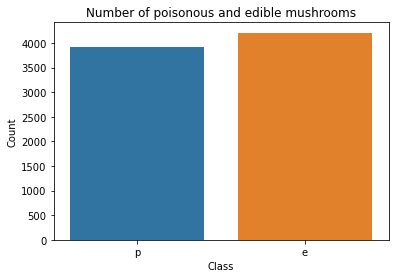

In [9]:
import warnings
warnings.simplefilter("ignore")
sns.countplot(df['class'])
plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Number of poisonous and edible mushrooms')
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [11]:
df=df.drop(["veil-type"],axis=1)

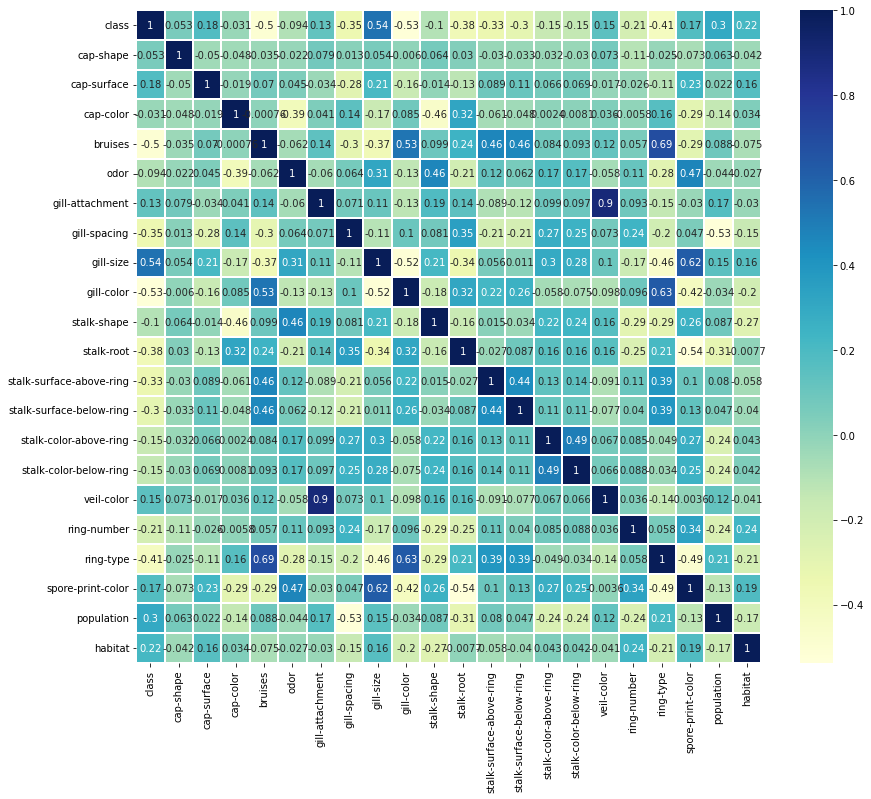

In [12]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [13]:
x=df.drop(['class'], axis=1)
y=df['class']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)

### Gaussian Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb_model= gnb.fit(x_train,y_train)
y_pred_gnb= gnb_model.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
acc_gnb= accuracy_score(y_test,y_pred_gnb)*100
f1_gnb=f1_score(y_test,y_pred_gnb)*100
confusion_matrix(y_test, y_pred_gnb)

array([[728,  97],
       [ 55, 745]], dtype=int64)

In [17]:
acc_gnb

90.64615384615384

In [18]:
f1_gnb

90.74299634591961

### Bernoulli naive bayes

In [20]:
from sklearn.naive_bayes import BernoulliNB
bnb= BernoulliNB()
bnb_model= bnb.fit(x_train,y_train)
y_pred_bnb= bnb_model.predict(x_test)

In [21]:
acc_bnb= accuracy_score(y_test,y_pred_bnb)*100
f1_bnb=f1_score(y_test,y_pred_bnb)*100
confusion_matrix(y_test, y_pred_bnb)

array([[792,  33],
       [209, 591]], dtype=int64)

In [22]:
acc_bnb

85.1076923076923

In [23]:
f1_bnb

83.00561797752809

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
Model={
    'Logistic Regression':LogisticRegression(),
    'KNN Classifier':KNeighborsClassifier(n_neighbors=6, metric="minkowski"),
    'Random Forest Classifier':RandomForestClassifier(),
    'Gradient Boosting Classifier':GradientBoostingClassifier(),
    'Decision Tree Classifier':DecisionTreeClassifier()  
}

In [25]:
result={}

for name,model in Model.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    result[name]=acc

In [26]:
result

{'Logistic Regression': 0.9563076923076923,
 'KNN Classifier': 0.9987692307692307,
 'Random Forest Classifier': 1.0,
 'Gradient Boosting Classifier': 1.0,
 'Decision Tree Classifier': 1.0}